In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
from keras.layers import (
    Concatenate,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    MaxPooling2D,
)
from keras.models import Model
from keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [3]:
def create_model():
    # Create the input of the CNN model
    input = Input((28, 28, 1), name="input")

    # Create the convilutional layers
    x = Conv2D(16, kernel_size=(3, 3), activation="relu", name="conv1")(input)
    x = MaxPooling2D(pool_size=(2, 2), name="maxpool1")(x)
    x = Conv2D(16, kernel_size=(3, 3), activation="relu", name="conv2")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="maxpool2")(x)
    x = Flatten()(x)

    # Fully connected layers
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(10, activation="softmax")(x)

    # Create the CNN model
    model = Model(input, x)

    # Compile the model
    model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model

In [4]:
model = create_model()
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=0,
)

In [5]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,928 (183.32 KB)

 Trainable params: 15,642 (61.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,286 (122.21 KB)

In [6]:
scores = model.evaluate(X_test, y_test, verbose=0)

print("Loss: %0.2f" % (scores[0]))
print("Accuracy: %0.2f%%" % (scores[1] * 100))

Loss: 0.04
Accuracy: 98.90%


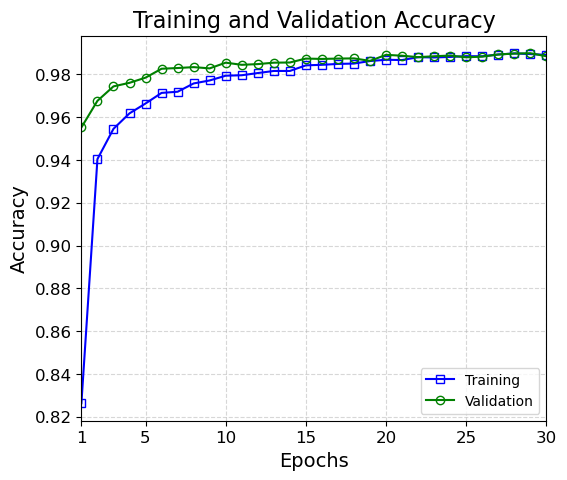

In [7]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.figure(figsize=(6, 5))
plt.plot(
    range(1, len(train_acc) + 1),
    train_acc,
    c="b",
    marker="s",
    markerfacecolor="None",
    markeredgecolor="b",
    label="Training",
)
plt.plot(
    range(1, len(val_acc) + 1),
    val_acc,
    c="g",
    marker="o",
    markerfacecolor="None",
    markeredgecolor="g",
    label="Validation",
)
plt.title("Training and Validation Accuracy", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks([1, 5, 10, 15, 20, 25, 30], fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1, 30)
plt.legend(loc="lower right")
plt.grid(linestyle="--", alpha=0.5, zorder=0)
plt.show()

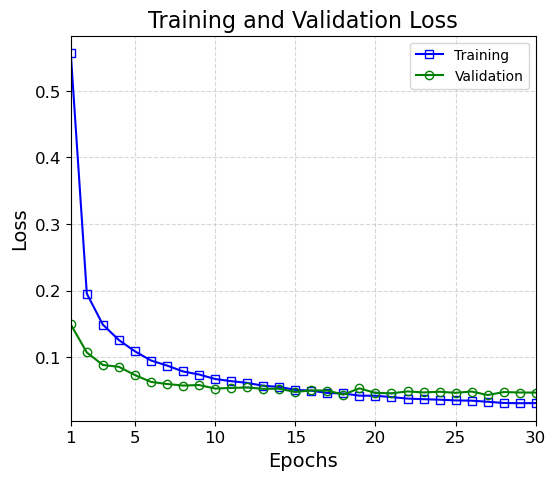

In [8]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(6, 5))
plt.plot(
    range(1, len(train_loss) + 1),
    train_loss,
    c="b",
    marker="s",
    markerfacecolor="None",
    markeredgecolor="b",
    label="Training",
)
plt.plot(
    range(1, len(val_loss) + 1),
    val_loss,
    c="g",
    marker="o",
    markerfacecolor="None",
    markeredgecolor="g",
    label="Validation",
)
plt.title("Training and Validation Loss", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.xticks([1, 5, 10, 15, 20, 25, 30], fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1, 30)
plt.legend(loc="upper right")
plt.grid(linestyle="--", alpha=0.5, zorder=0)
plt.show()

In [9]:
def plot_conv_layer(model, layer_name, data):
    layer_output = model.get_layer(layer_name).output
    intermediate_model = Model(inputs=model.input, outputs=layer_output)
    intermediate_prediction = intermediate_model.predict(data)

    # Obtener el número de filtros en la capa
    num_filters = layer_output.shape[-1]

    # Tamaño de la cuadrícula para la visualización
    square = int(np.ceil(np.sqrt(num_filters)))

    # Visualizar cada filtro
    fig, axes = plt.subplots(square, square, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            # Mostrar la imagen del filtro
            ax.imshow(intermediate_prediction[0, :, :, i], cmap="viridis")
        ax.axis("off")
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


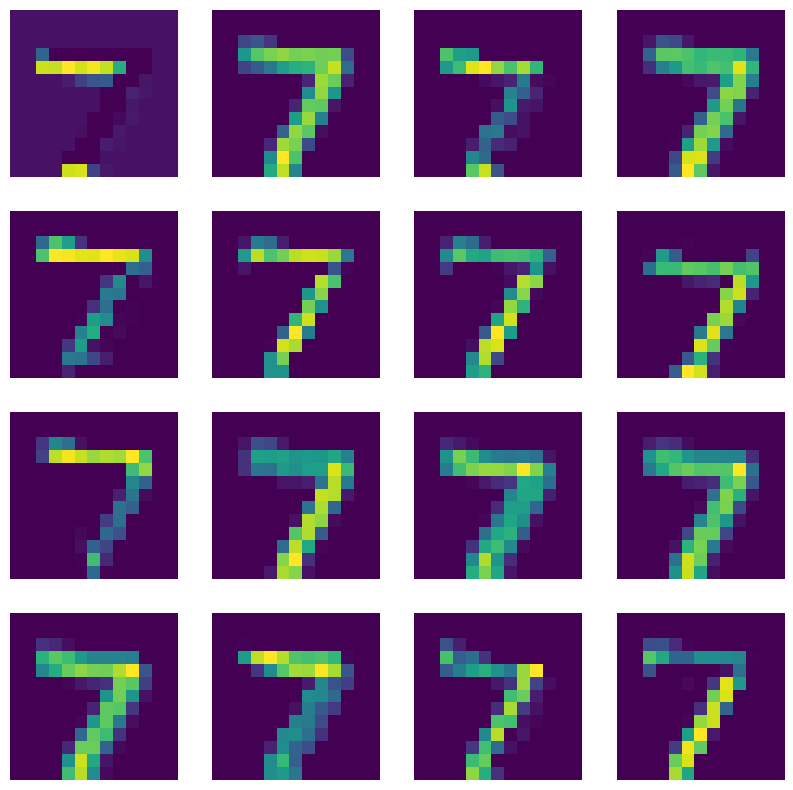

In [10]:
plot_conv_layer(model, "maxpool1", X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


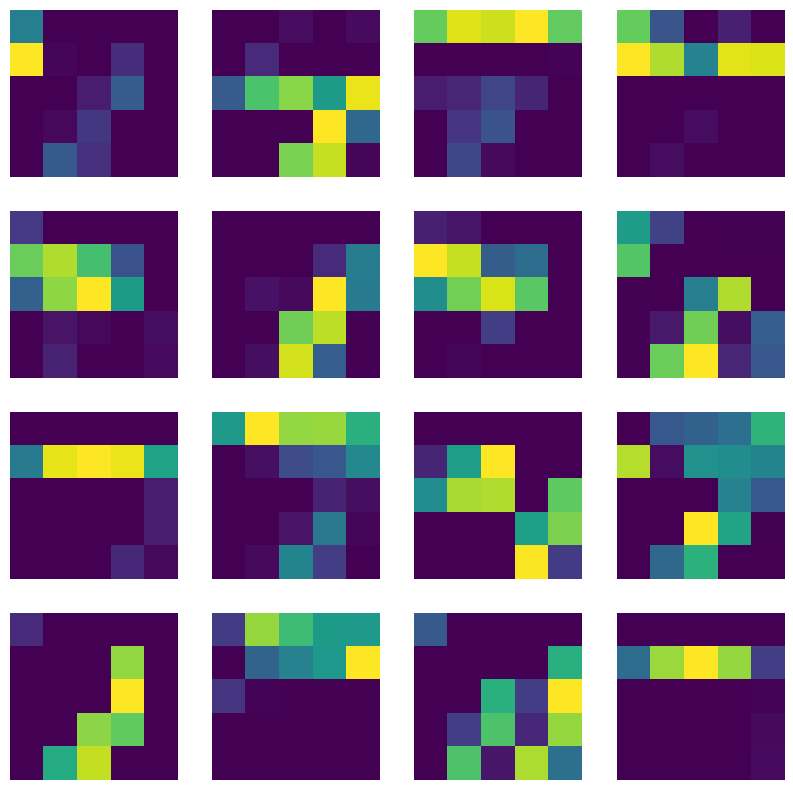

In [11]:
plot_conv_layer(model, "maxpool2", X_test)